In [1]:
import pandas as pd
import scipy.stats
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

sns.set_theme(style="ticks", palette="pastel")

In [2]:
df = pd.read_csv("all-results-cleaned.csv")

colname_dict = {
    "IBk1": "1NN",
    "IBk5": "5NN",
    "J48": "DT",
    "MultilayerPerceptron": "MLP",
    "MykNN1": "My1NN",
    "MykNN5": "My5NN",
    "NaiveBayes": "NB",
    "OneR": "1R",
    "RandomForest": "RF",
    "SMO": "SVM"
}
df["classifier"] = df["classifier"].replace(colname_dict).astype(pd.CategoricalDtype(ordered=True))
df["classifier"].cat = df["classifier"].cat.reorder_categories([
    "ZeroR",
    "1R",
    "1NN",
    "5NN",
    "NB",
    "DT",
    "MLP",
    "SVM",
    "RF",
    "My1NN",
    "My5NN",
    "MyNB",
])
df.sort_values(by="classifier")


df_cv_agg = df.groupby(by=["dataset", "classifier", "run"]).mean().reset_index()
df_cv_agg = df_cv_agg.loc[:, ~df_cv_agg.columns.isin(['fold'])]

In [3]:
df_means = df.groupby(by=["dataset", "classifier", "run"]).mean().groupby(by=["dataset", "classifier"]).mean().reset_index()
df_means.sort_values(by=["classifier"])
df_means.loc[:, ~df_means.columns.isin(["run", "fold"])]

,dataset,classifier,percent_correct,training_time_ms,testing_time_ms
0,pima,1NN,69.332194,0.110000,2.650000
1,pima,1R,70.951640,0.830000,0.030000
2,pima,5NN,74.928401,0.080000,2.920000
3,pima,DT,74.765721,3.540000,0.020000
4,pima,MLP,75.022386,330.010000,0.030000
5,pima,My1NN,69.271018,9.185042,3.541009
6,pima,My5NN,74.859706,9.364767,4.101655
7,pima,MyNB,74.818865,4.726233,2.337964
8,pima,NB,74.805366,0.560000,0.140000
9,pima,RF,76.079973,160.960000,5.440000


In [4]:
pima_df = df.loc[df["dataset"].isin(["pima"])].groupby(by=["dataset", "classifier", "run"]).mean().reset_index()
pima_cfs_df = df.loc[df["dataset"].isin(["pima-CFS"])].groupby(by=["dataset", "classifier", "run"]).mean().reset_index()
pima_differences = pima_df.copy()
for col in ("percent_correct", "training_time_ms", "testing_time_ms"):
    pima_differences[col] = pima_cfs_df[col] - pima_df[col]

In [5]:
pima_differences_means = pima_differences.groupby(by=["dataset", "classifier"]).mean()
pima_differences_means

run  fold  percent_correct  training_time_ms  \
dataset classifier                                                 
pima    1NN         5.5   5.5        -1.143712         -0.020000   
        1R          5.5   5.5         0.000000         -0.260000   
        5NN         5.5   5.5         0.173274         -0.010000   
        DT          5.5   5.5        -0.092276         -1.360000   
        MLP         5.5   5.5         1.408066       -145.080000   
        My1NN       5.5   5.5        -1.189337         -3.435314   
        My5NN       5.5   5.5         0.050923         -3.359311   
        MyNB        5.5   5.5         1.664388         -1.419966   
        NB          5.5   5.5         1.575188         -0.200000   
        RF          5.5   5.5        -0.195147         34.670000   
        SVM         5.5   5.5         0.627136         -2.220000   
        ZeroR       5.5   5.5         0.000000         -0.070000   

                    testing_time_ms  
dataset classifier                   
pima    1NN               -0.360000  
        1R                 0.040000  
        5NN               -0.420000  
        DT                 0.030000  
        MLP                0.060000  
        My1NN             -0.190198  
        My5NN             -0.368099  
        MyNB               0.075126  
        NB                 0.010000  
        RF                 3.340000  
        SVM                0.030000  
        ZeroR             -0.100000

In [6]:
pima_differences_errs = pima_differences.groupby(by=["dataset", "classifier"]).std()
ci_95 = lambda x: 1.96 * x / np.sqrt(10)
for col in ("percent_correct", "training_time_ms", "testing_time_ms"):
    pima_differences_errs[col] = pima_differences_errs[col].apply(ci_95)
pima_differences_errs

run  fold  percent_correct  training_time_ms  \
dataset classifier                                                     
pima    1NN         3.02765   0.0         0.859546          0.081601   
        1R          3.02765   0.0         0.000000          0.140732   
        5NN         3.02765   0.0         0.631508          0.068210   
        DT          3.02765   0.0         0.562861          0.306719   
        MLP         3.02765   0.0         0.574670          4.074915   
        My1NN       3.02765   0.0         0.569175          0.529728   
        My5NN       3.02765   0.0         0.554239          0.736255   
        MyNB        3.02765   0.0         0.267247          0.349332   
        NB          3.02765   0.0         0.247811          0.105347   
        RF          3.02765   0.0         0.677830         37.033859   
        SVM         3.02765   0.0         0.243804          1.782726   
        ZeroR       3.02765   0.0         0.000000          0.127526   

                    testing_time_ms  
dataset classifier                   
pima    1NN                0.185252  
        1R                 0.052267  
        5NN                0.126686  
        DT                 0.029939  
        MLP                0.059879  
        My1NN              0.411022  
        My5NN              0.318073  
        MyNB               0.322579  
        NB                 0.135320  
        RF                 2.679336  
        SVM                0.077579  
        ZeroR              0.105347

In [7]:
df_errs = df.groupby(by=["dataset", "classifier", "run"]).std().groupby(by=["dataset", "classifier"]).std()
ci_95 = lambda x: 1.96 * x / np.sqrt(10)
df_errs["percent_correct"] = df_errs.percent_correct.apply(ci_95)
df_errs["training_time_ms"] = df_errs.training_time_ms.apply(ci_95)
df_errs["testing_time_ms"] = df_errs.testing_time_ms.apply(ci_95)
df_errs.loc[:, ~df_errs.columns.isin(["run", "fold"])]

percent_correct  training_time_ms  testing_time_ms
dataset  classifier                                                    
pima     1NN                0.563820          0.116404         0.117886
         1R                 0.649257          0.286568         0.097636
         5NN                0.606497          0.125265         0.101318
         DT                 0.721055          0.226185         0.082641
         MLP                0.704237          5.476382         0.094677
         My1NN              0.563217          1.634945         0.734380
         My5NN              0.600227          1.532590         0.868268
         MyNB               0.562269          0.656121         0.398904
         NB                 0.447111          0.007873         0.126747
         RF                 0.484566         12.315659         0.684451
         SVM                0.612647          2.469252         0.094677
         ZeroR              0.000000          0.351426         0.092525
pima-CFS 1NN                0.475894          0.132290         0.162646
         1R                 0.649257          0.032448         0.108671
         5NN                0.715561          0.108671         0.084090
         DT                 0.435991          0.115048         0.103301
         MLP                0.718860          2.380010         0.121058
         My1NN              0.979678          0.838364         0.802615
         My5NN              0.669321          0.998364         0.414272
         MyNB               0.578424          1.104016         0.844920
         NB                 0.467738          0.022336         0.147015
         RF                 0.466261         35.608787         6.203371
         SVM                0.354649          0.081138         0.118387
         ZeroR              0.000000          0.111259         0.128770

In [8]:
def plot_boxplot(y, xlab, ylab, title):
    plt.figure(figsize=(30, 20))
    p = sns.boxplot(x="classifier", y=y, 
                hue="dataset", palette=["m", "g"],  
                data=df_cv_agg)
    p.set_xlabel(xlab)
    p.set_ylabel(ylab)
    p.set_title(title)
    p.get_legend().set(title="Dataset")

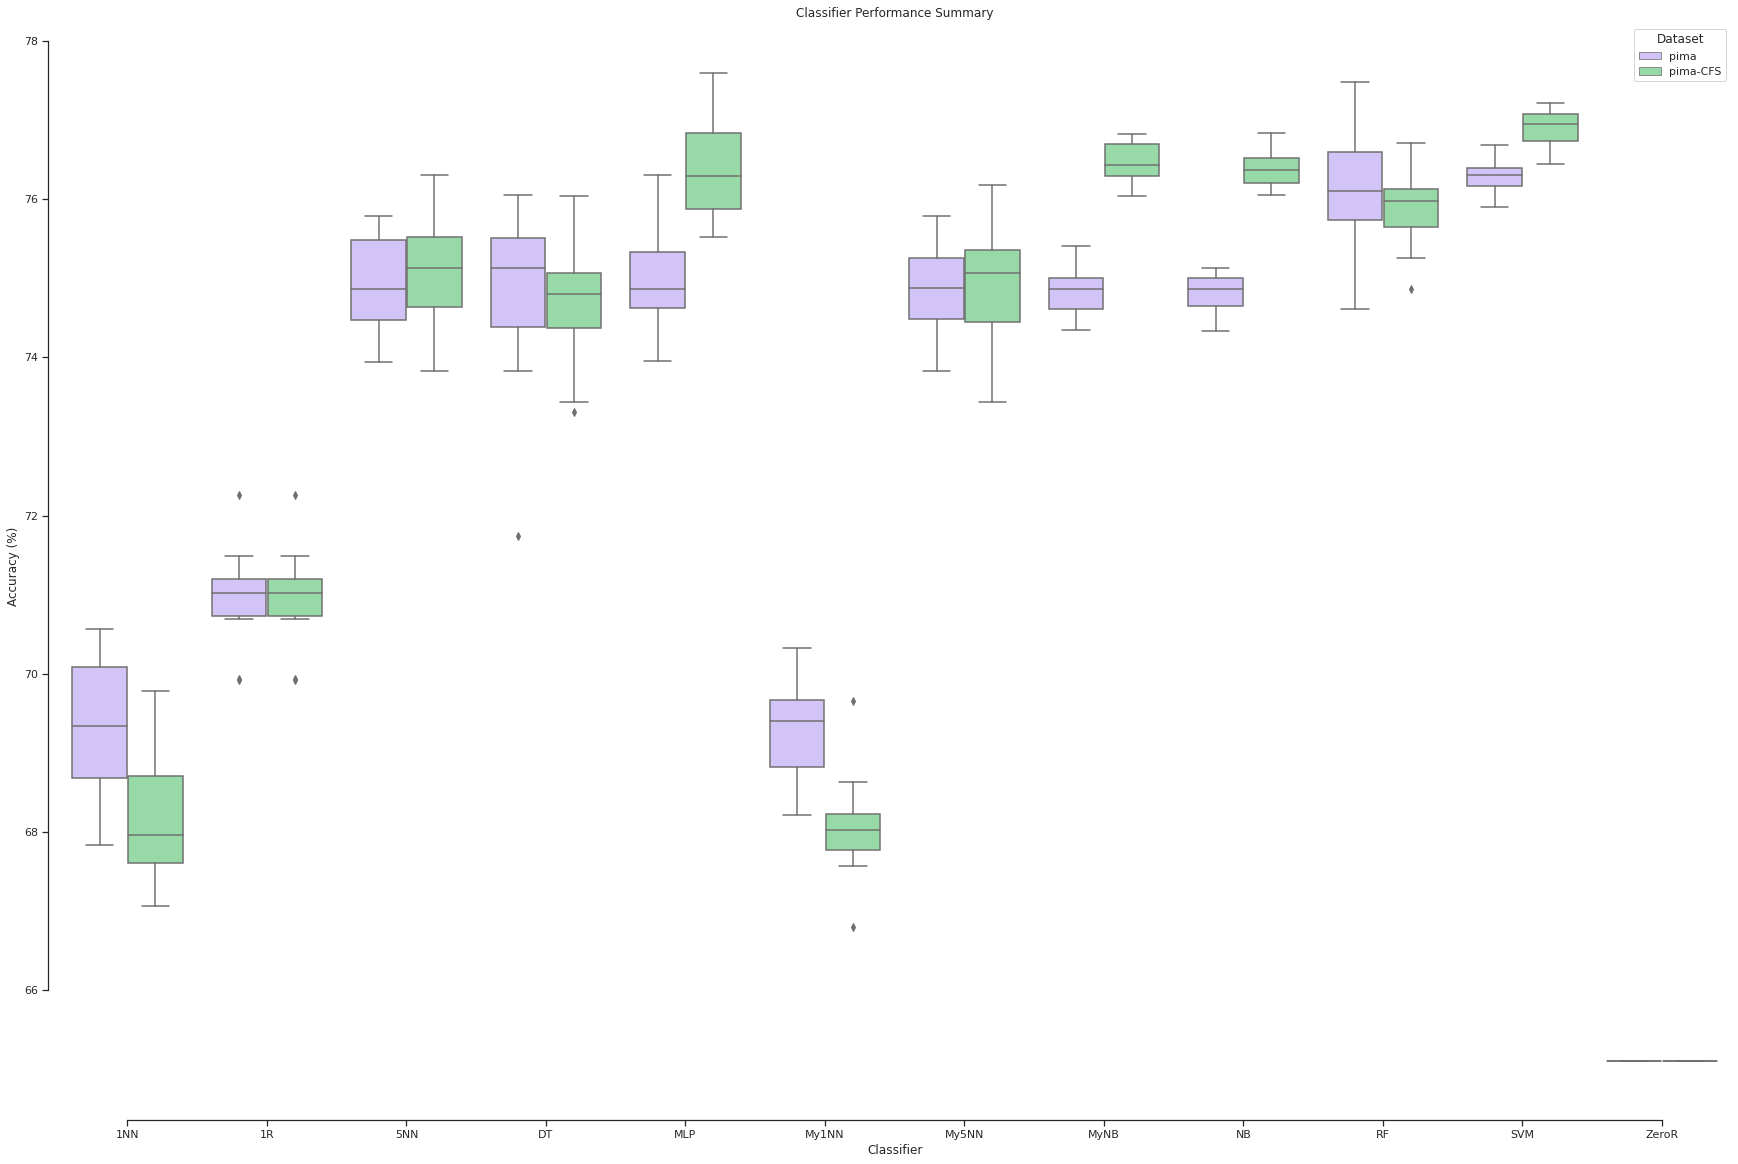

In [9]:
plot_boxplot("percent_correct", "Classifier", "Accuracy (%)", "Classifier Performance Summary")
sns.despine(offset=10, trim=True)

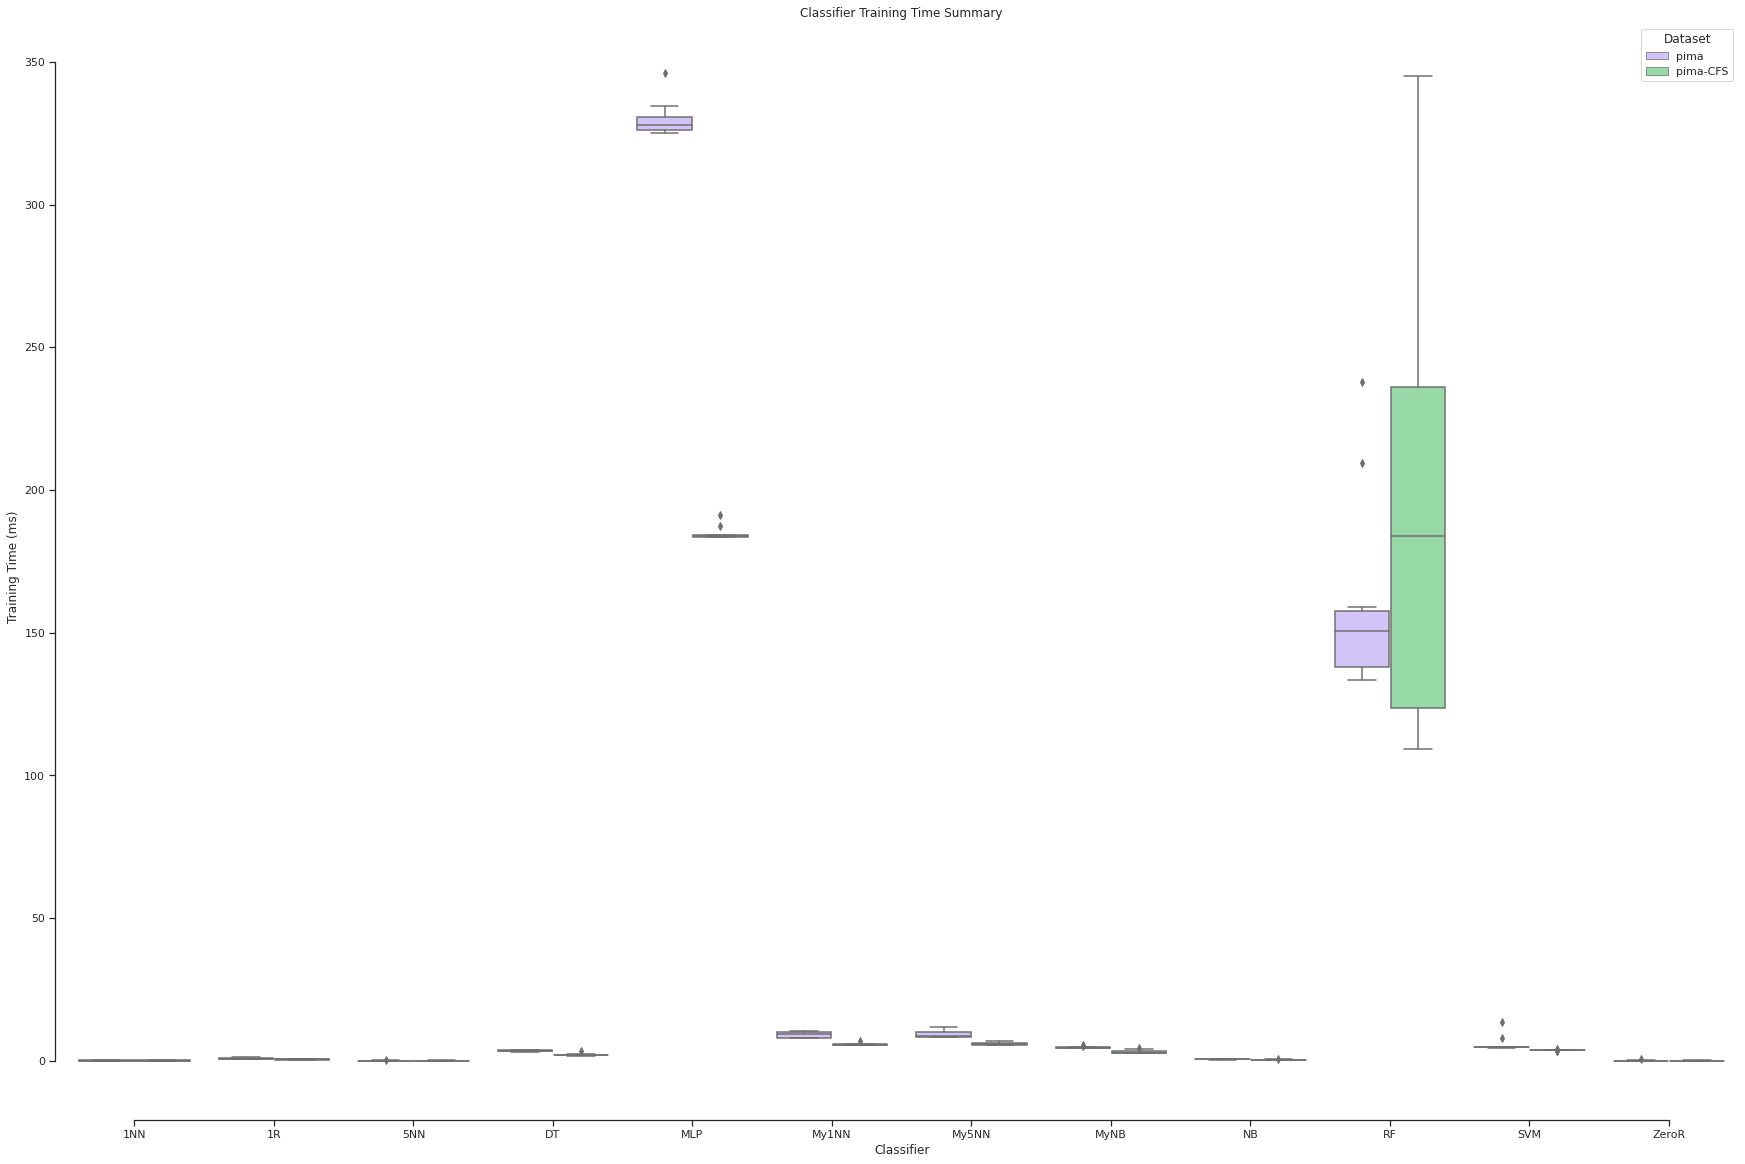

In [10]:
plot_boxplot("training_time_ms", "Classifier", "Training Time (ms)", "Classifier Training Time Summary")
sns.despine(offset=10, trim=True)

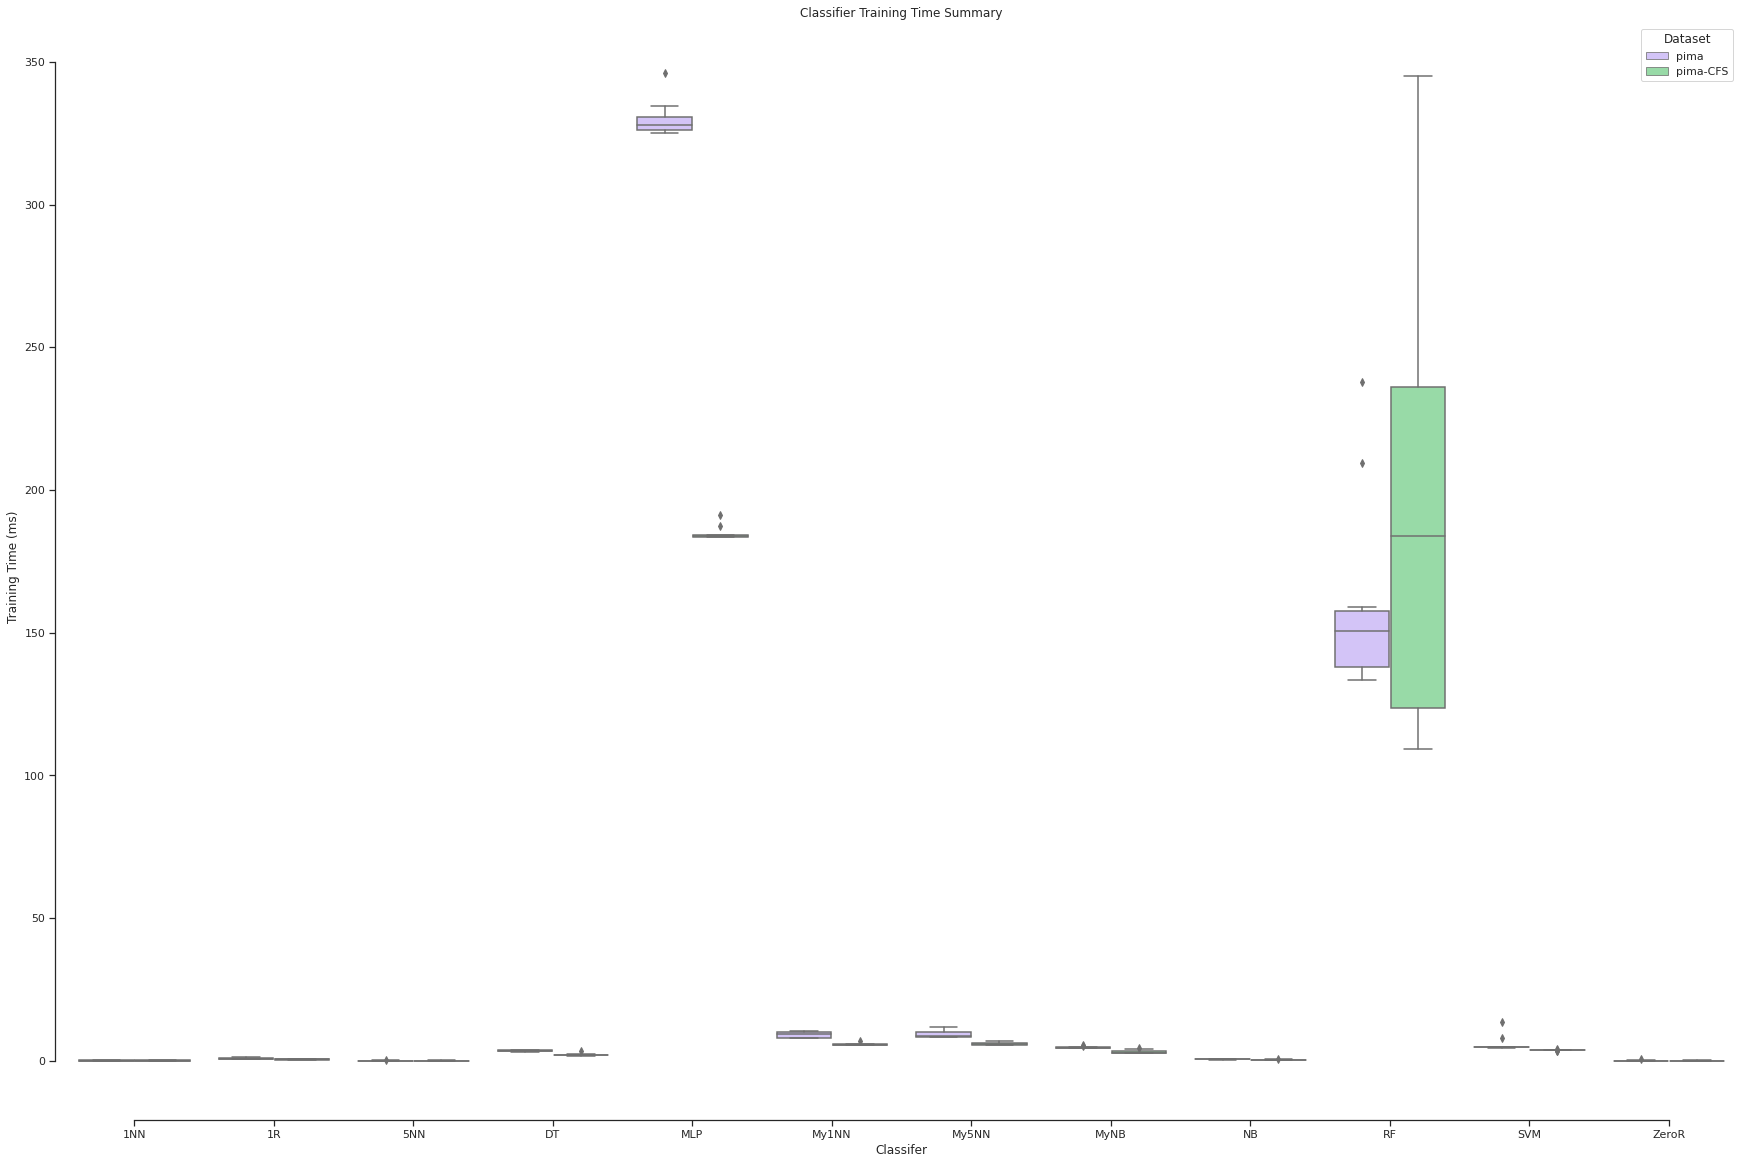

In [11]:
plt.figure(figsize=(30, 20))
p = sns.boxplot(x="classifier", y="training_time_ms", 
            hue="dataset", palette=["m", "g"],  
            data=df_cv_agg.loc[~df_cv_agg['classifier'].isin(("RandomForest", "MultilayerPerceptron"))])
p.set_xlabel("Classifer")
p.set_ylabel("Training Time (ms)")
p.set_title("Classifier Training Time Summary")
p.get_legend().set(title="Dataset")

sns.despine(offset=10, trim=True)

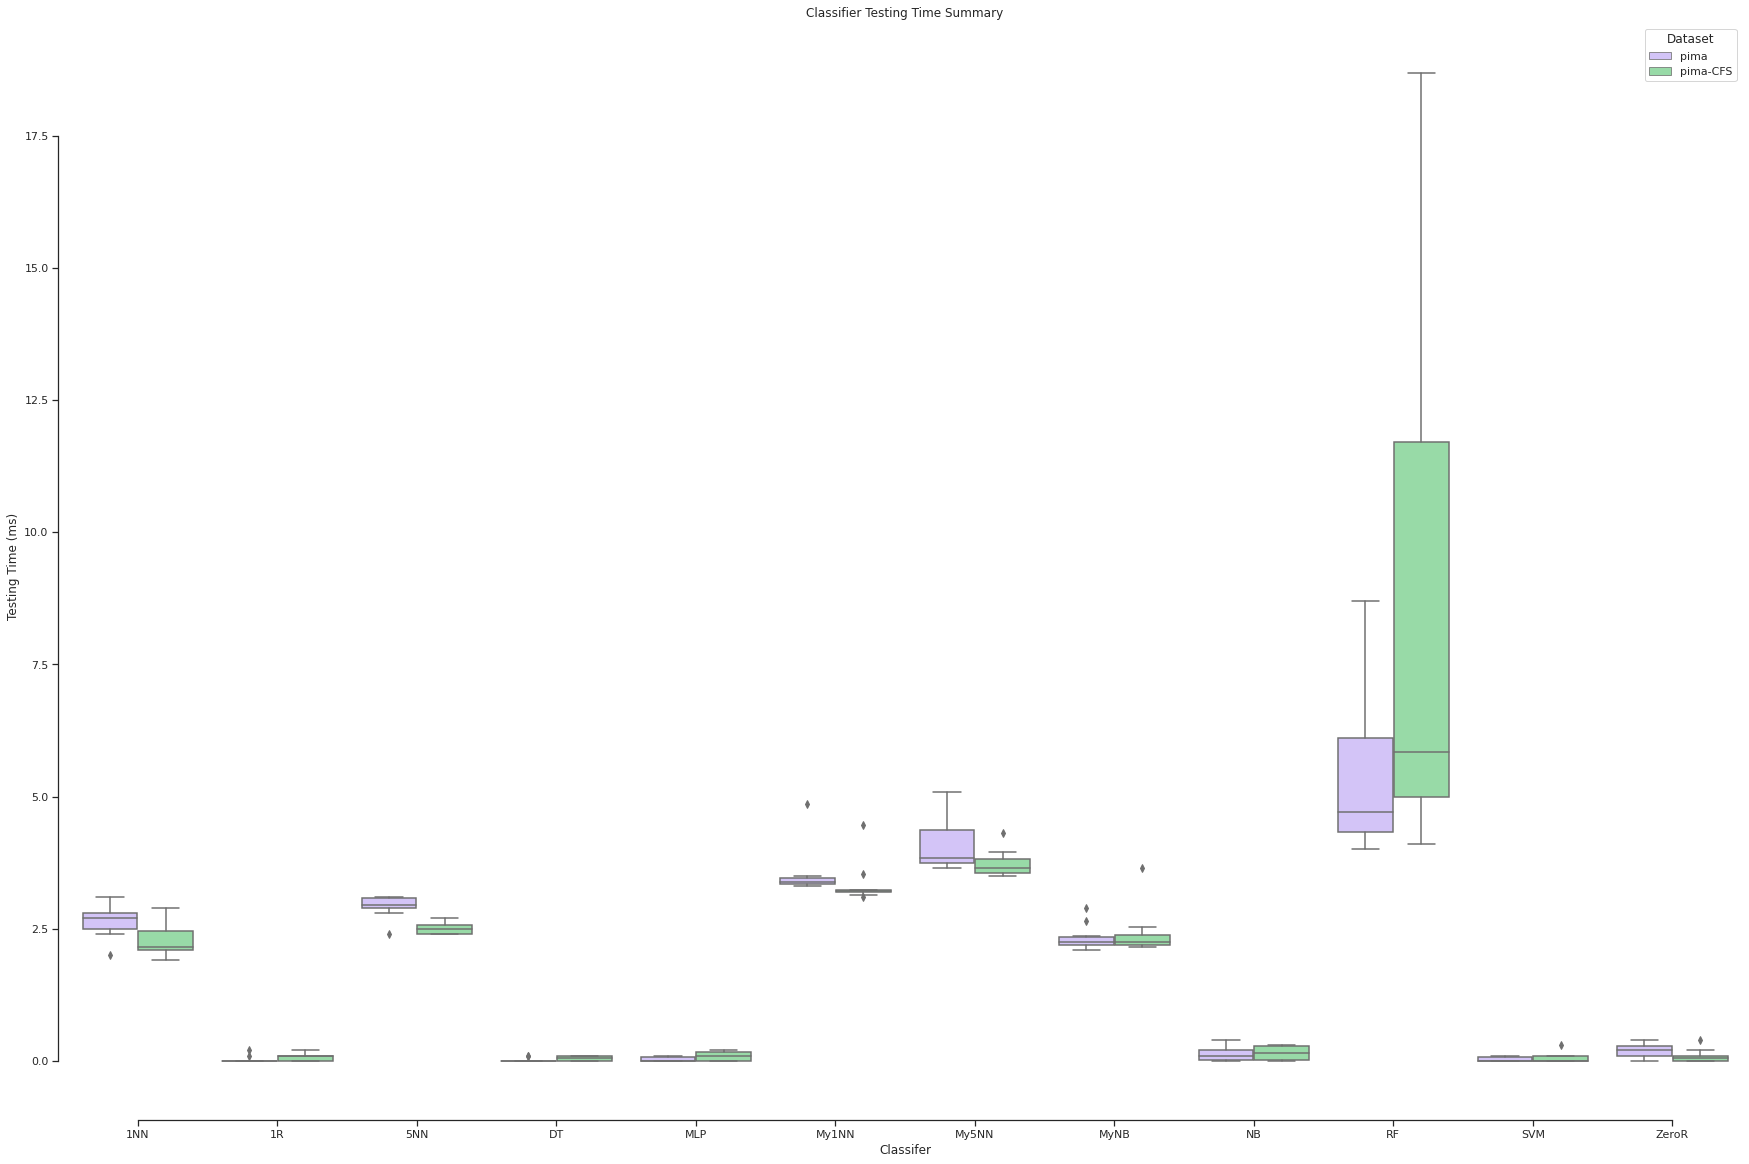

In [12]:
plt.figure(figsize=(30, 20))
p = sns.boxplot(x="classifier", y="testing_time_ms", 
            hue="dataset", palette=["m", "g"],  
            data=df_cv_agg)
p.set_xlabel("Classifer")
p.set_ylabel("Testing Time (ms)")
p.set_title("Classifier Testing Time Summary")
p.get_legend().set(title="Dataset")

sns.despine(offset=10, trim=True)

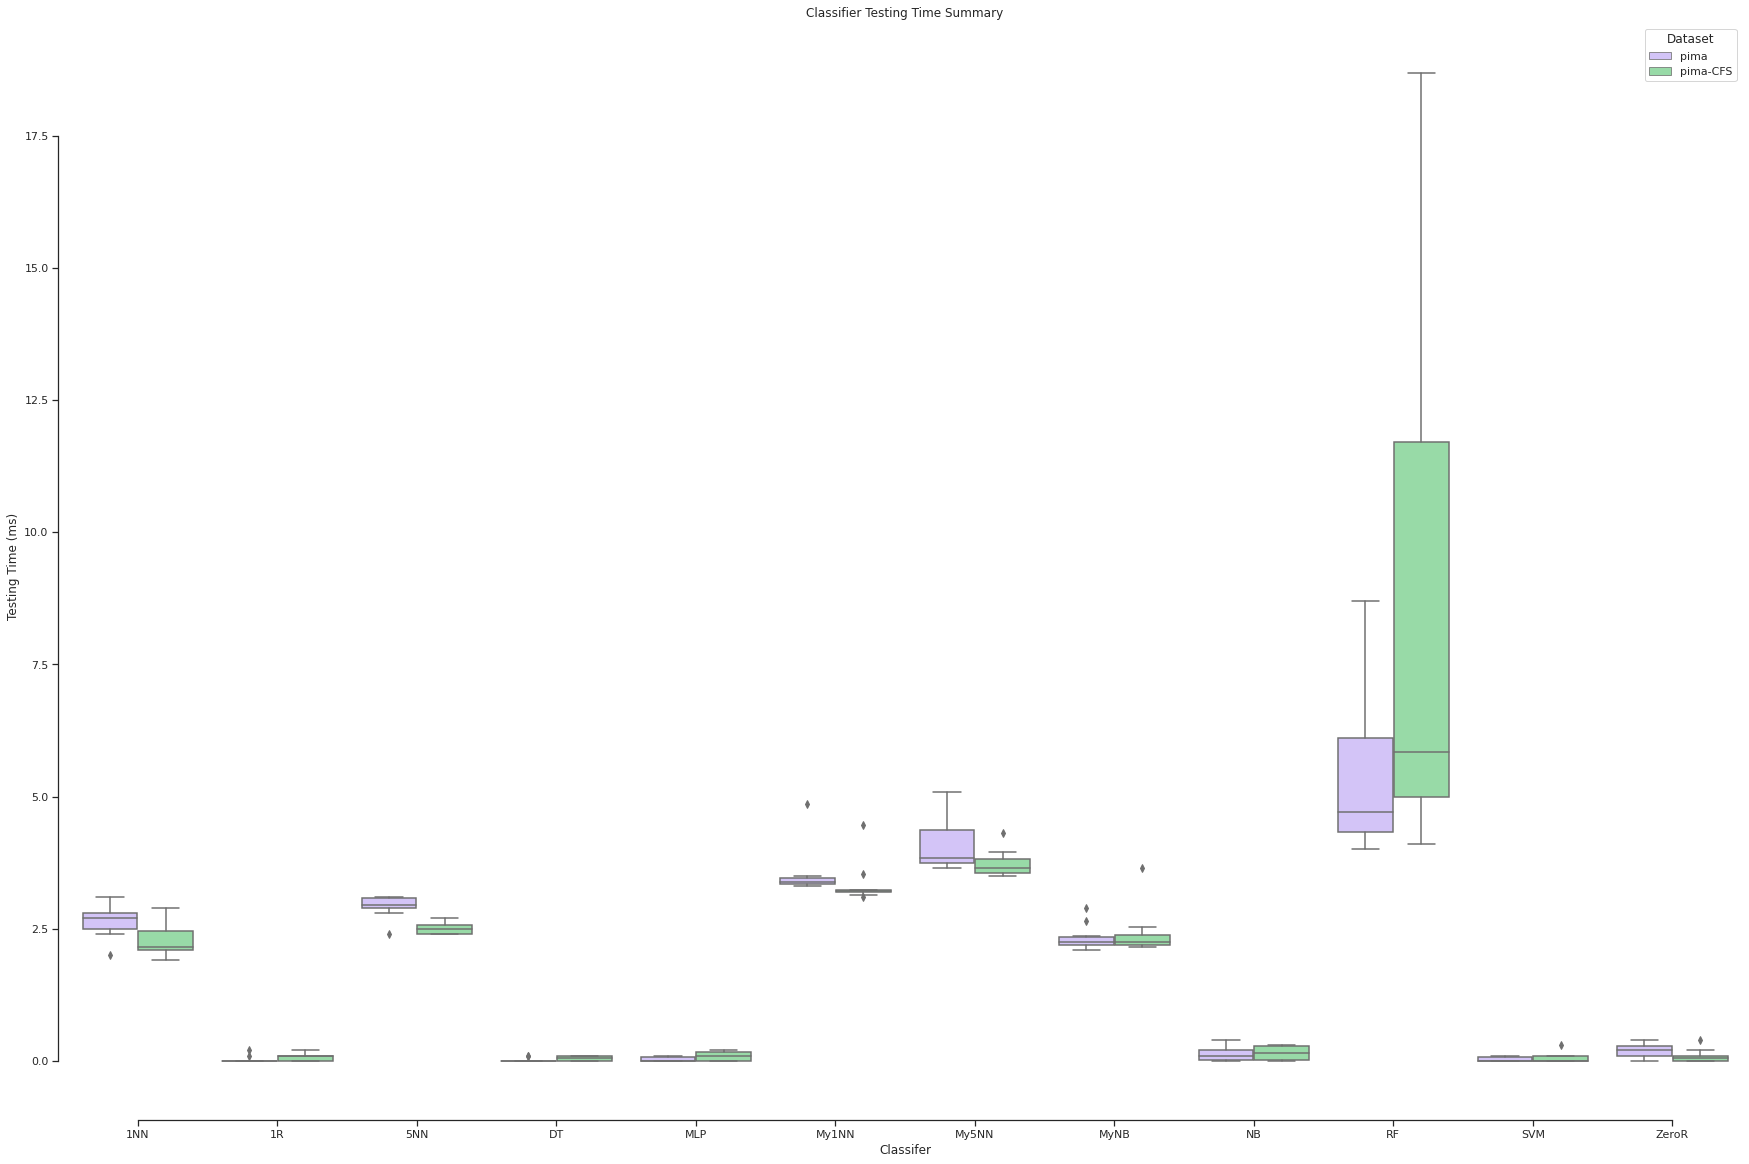

In [13]:
plt.figure(figsize=(30, 20))
p = sns.boxplot(x="classifier", y="testing_time_ms", 
            hue="dataset", palette=["m", "g"], 
            data=df_cv_agg.loc[~df_cv_agg['classifier'].isin(("RandomForest",))])
p.set_xlabel("Classifer")
p.set_ylabel("Testing Time (ms)")
p.set_title("Classifier Testing Time Summary")
p.get_legend().set(title="Dataset")

sns.despine(offset=10, trim=True)

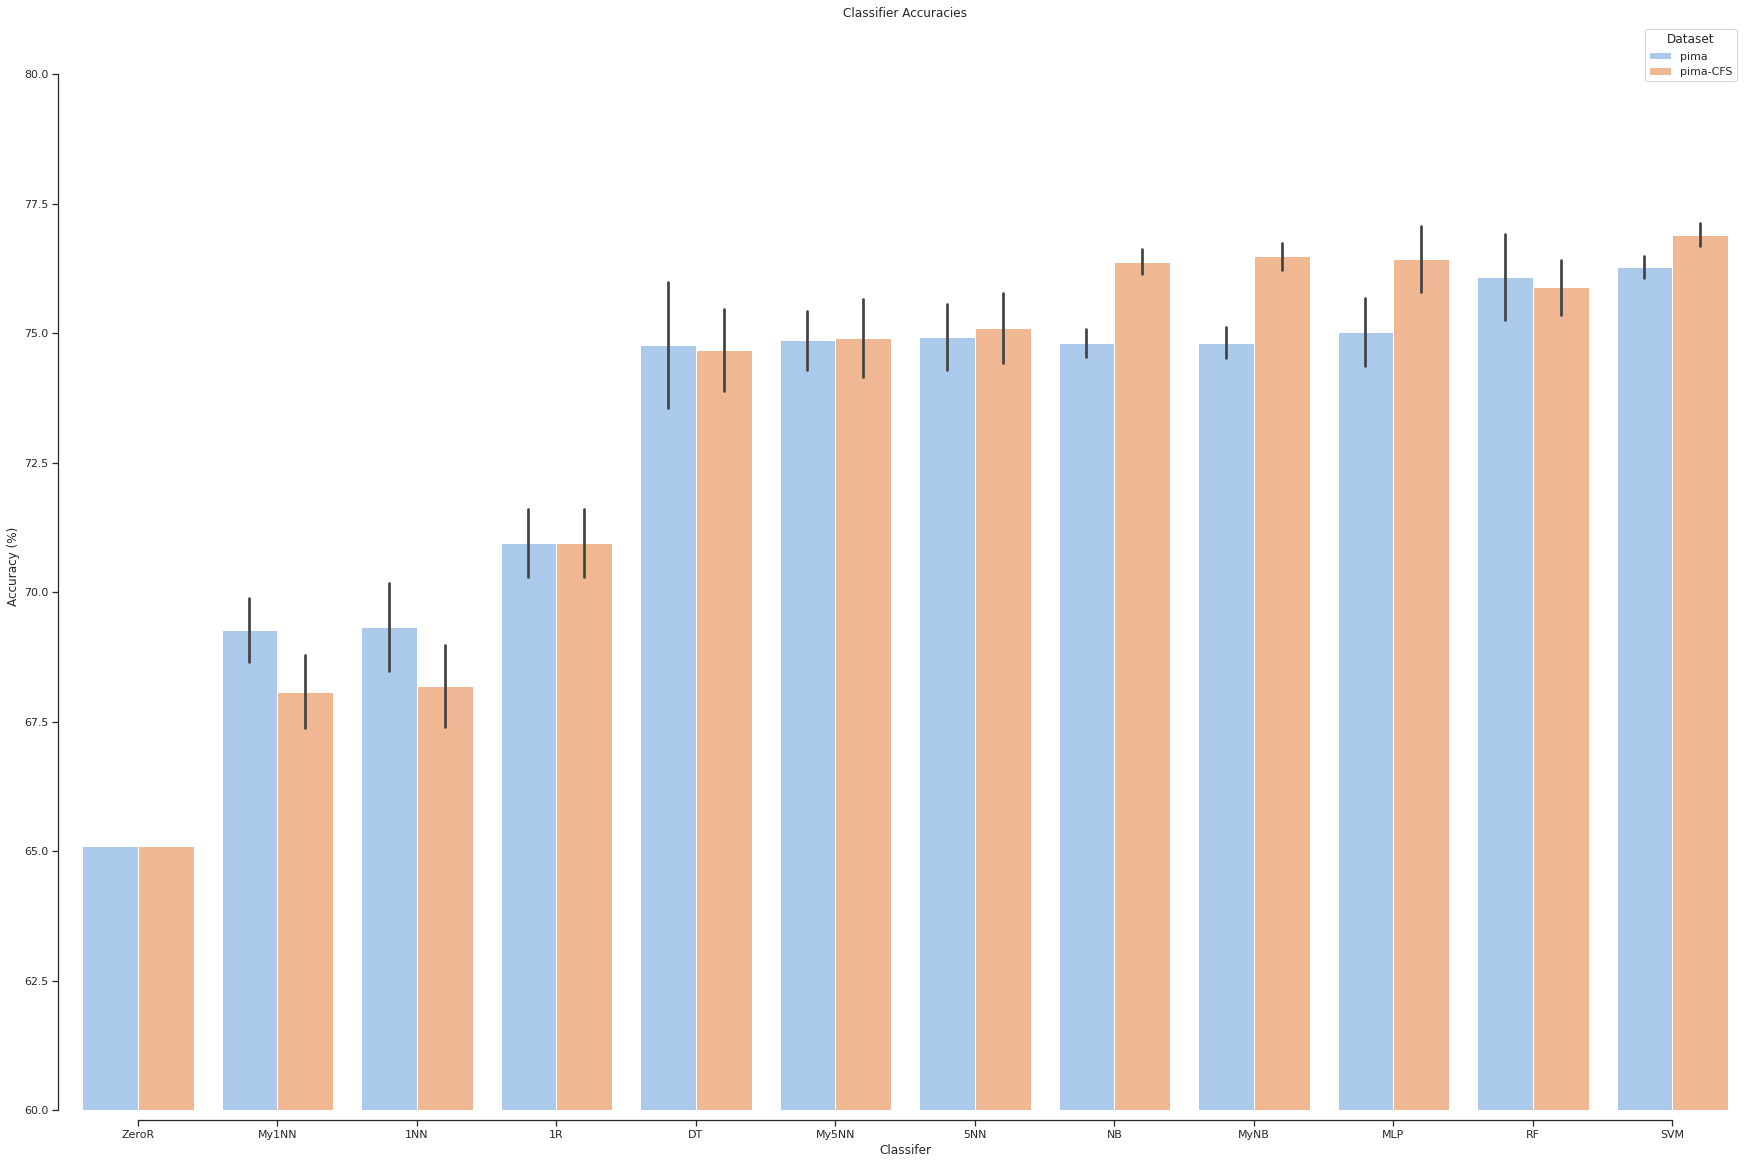

In [14]:
plt.figure(figsize=(30, 20))
plot_order = df_cv_agg.groupby(["classifier"]).mean().reset_index().sort_values(by='percent_correct').classifier.values
ax = sns.barplot(x="classifier", y="percent_correct", hue="dataset", ci="sd", data=df_cv_agg, order=plot_order)
ax.set_xlabel("Classifer")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Classifier Accuracies")
ax.get_legend().set(title="Dataset")
ax.set_ylim(bottom=60)

ax.get_figure().savefig("Initial Accuracy.png")
sns.despine(offset=10, trim=True)

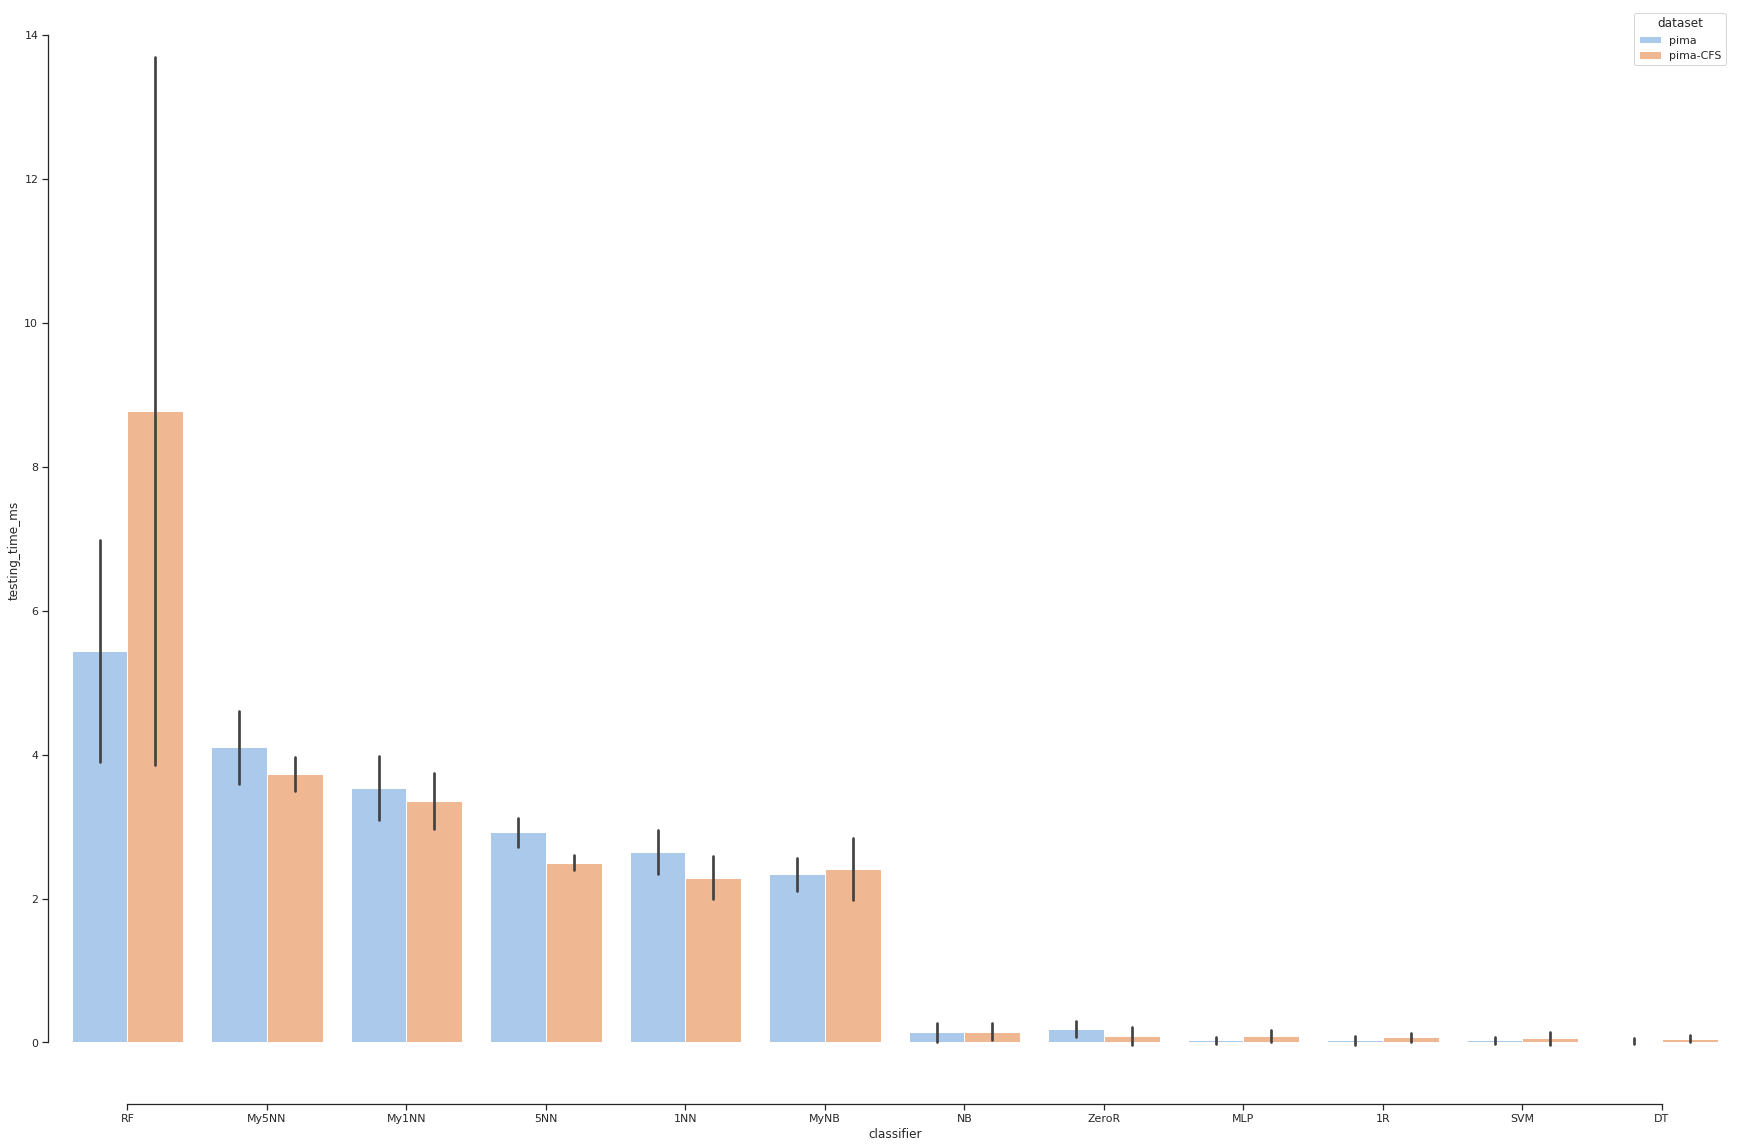

In [15]:
plt.figure(figsize=(30, 20))
plot_order_test = df_cv_agg.groupby(["classifier"]).mean().reset_index().sort_values(by='testing_time_ms', ascending=False).classifier.values
ax = sns.barplot(x="classifier", y="testing_time_ms", hue="dataset", ci="sd", data=df_cv_agg, order=plot_order_test)

sns.despine(offset=10, trim=True)